## Author:Ahmed Taha
## Image segmentation using kmeans

-In computer vision, image segmentation is the process of partitioning an image into multiple segments. 

-The goal of segmenting an image is to change the representation of an image into something that is more meaningful and easier to analyze. It is usually used for locating objects and creating boundaries.

-Image segmentation is the task of partitioning an image into multiple segments. In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment

-For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would just be one segment containing all the pedestrians).

-all pixels that are part of the same individual object are assigned to the same segment.In this case there would be a different segment for each pedestrian

### Used in self-driving cars. Autonomous driving is not possible without object detection which involves segmentation.
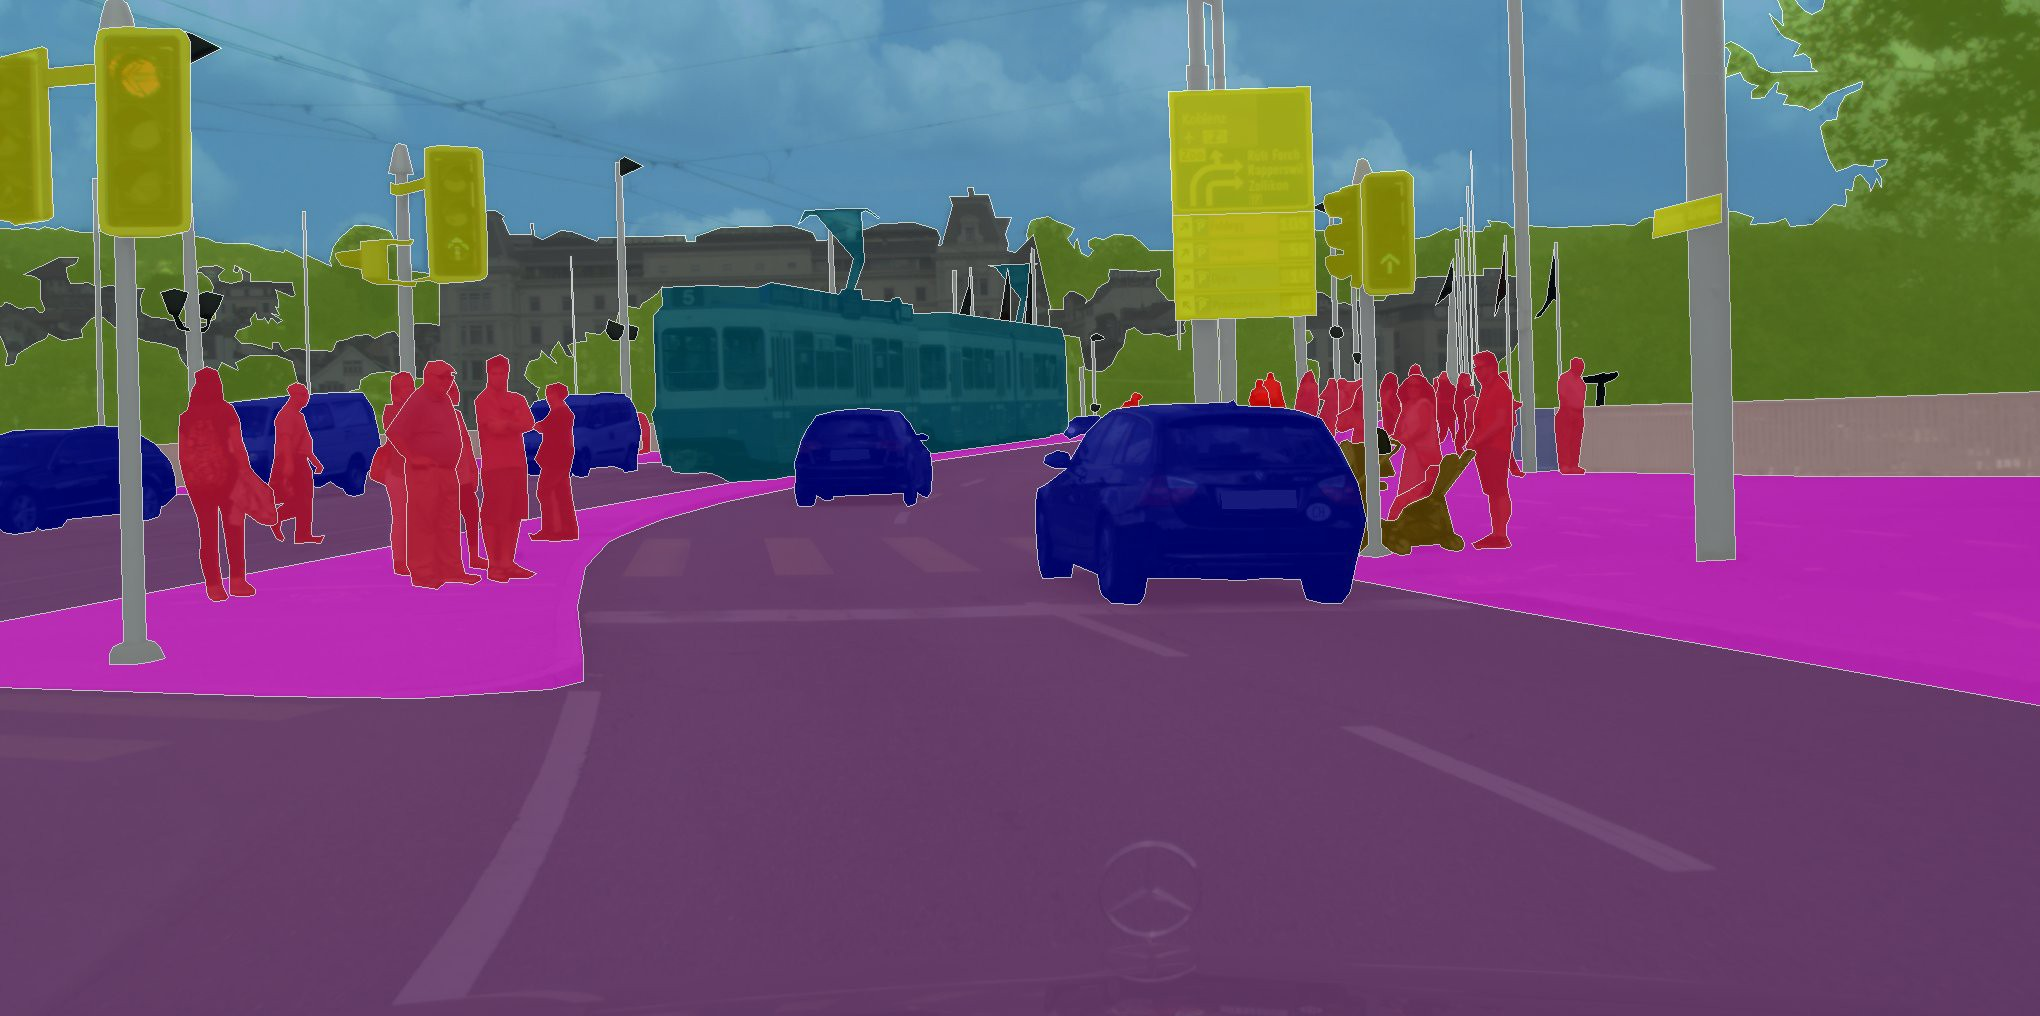
### Used in the healthcare industry. Helpful in segmenting cancer cells and tumours using which their severity can be gauged.
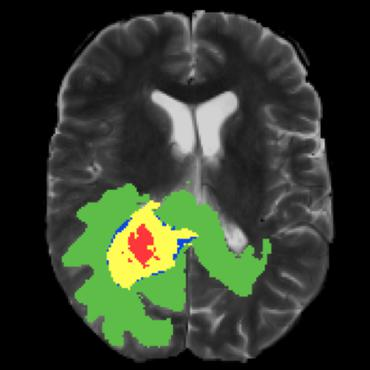

## Implemention

## Here we use the open cv trained model kmeans to can manipulate on the image easly 
-if you dont know what is open cv ,opencv is a  library which used mainly in computer vision opencv is powerfull in handel the processing on the image and can get any pixel in image

-i hope you search for it's very powerfull tool used now days https://opencv.org/

##  Modules

### Please take care you need to import opencv library using pip or conda before run  the code

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image 
from IPython.display import display

## read the image 

In [29]:
img = cv2.imread("Natural-tree.jpg")

## Opencv reads the image in form of BGR not RGB 

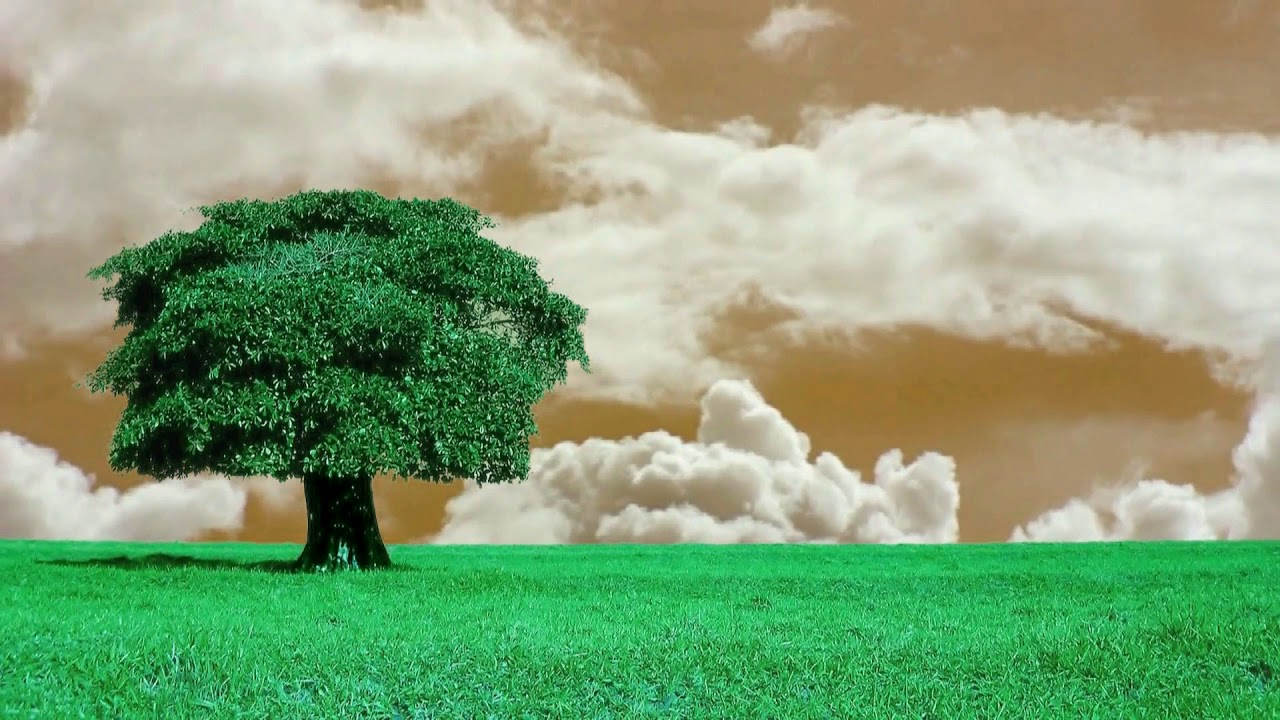

In [52]:
display(Image.fromarray(img))

## So we need to convert the image to rgb to can view  by using cvt color function in opencv

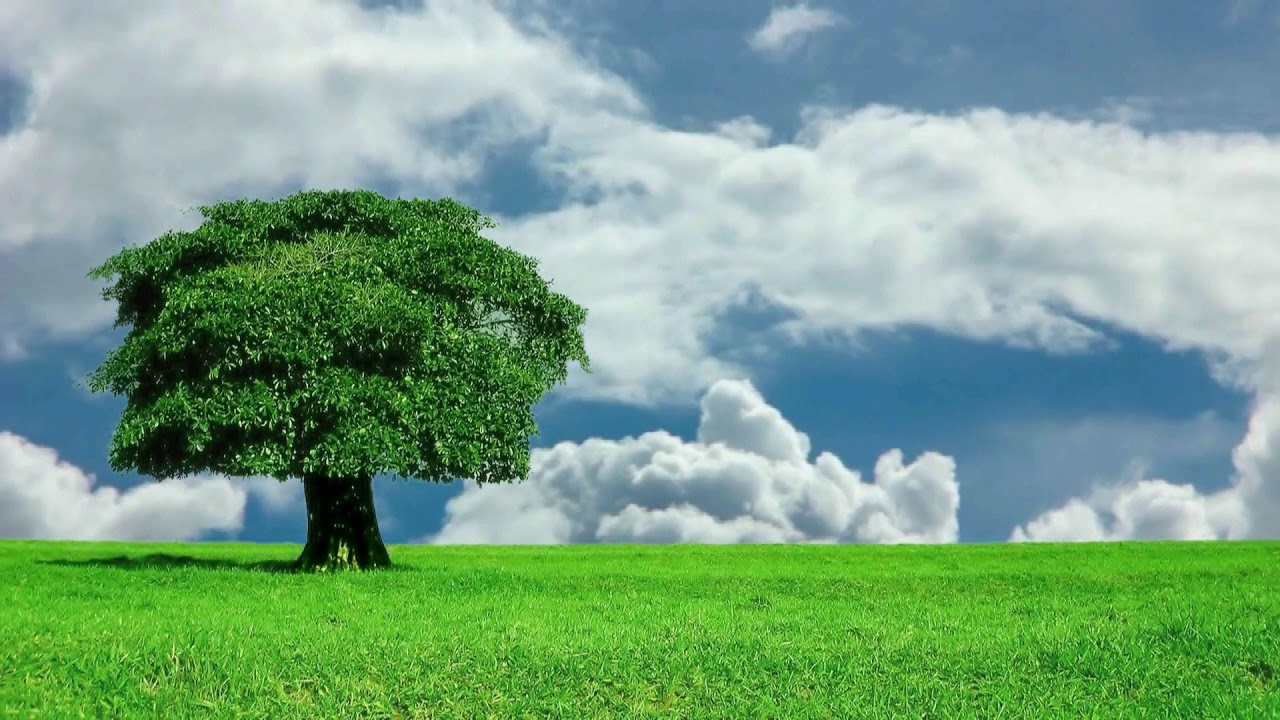

In [53]:
IMG_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display(Image.fromarray(IMG_RGB))

## Shows the image shape

In [32]:
img.shape

(720, 1280, 3)

## converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

In [33]:
Z = img.reshape((-1,3))

## Convert the array to float numbers

In [34]:
Z = np.float32(Z)

## Define criteria

In [35]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [65]:
ret,label,center=cv2.kmeans(Z,3,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
label.shape

(921600, 1)

In [66]:
label

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [68]:
label.shape

(921600, 1)

In [67]:
center

array([[205.9286  , 205.29793 , 188.81953 ],
       [ 35.297497, 133.4209  ,  64.578735],
       [154.65034 , 140.3109  ,  97.926544]], dtype=float32)

# Note

#### label: is the assign for every pixel to which class ex the first pixel will assigned for the first cluster and second pixel for first cluster also while the 10000 pixle will assigned to another cluster of the 3 cluster which we choosed above 
#### center: return the centroide of every cluster 
#### label.flatten(): will convert the array for veritical array to horizonatl ex: if a.shape=(m,1) a=a.flaten then a.shape=(1,m)
#### np.unit8 to convert the center to int number cant use the float as pixles 

 ## Now will try different value of k and convert back into uint8, and make original image and shows the images at every k the more the k the best segmention for the image

The no of cluster is 2


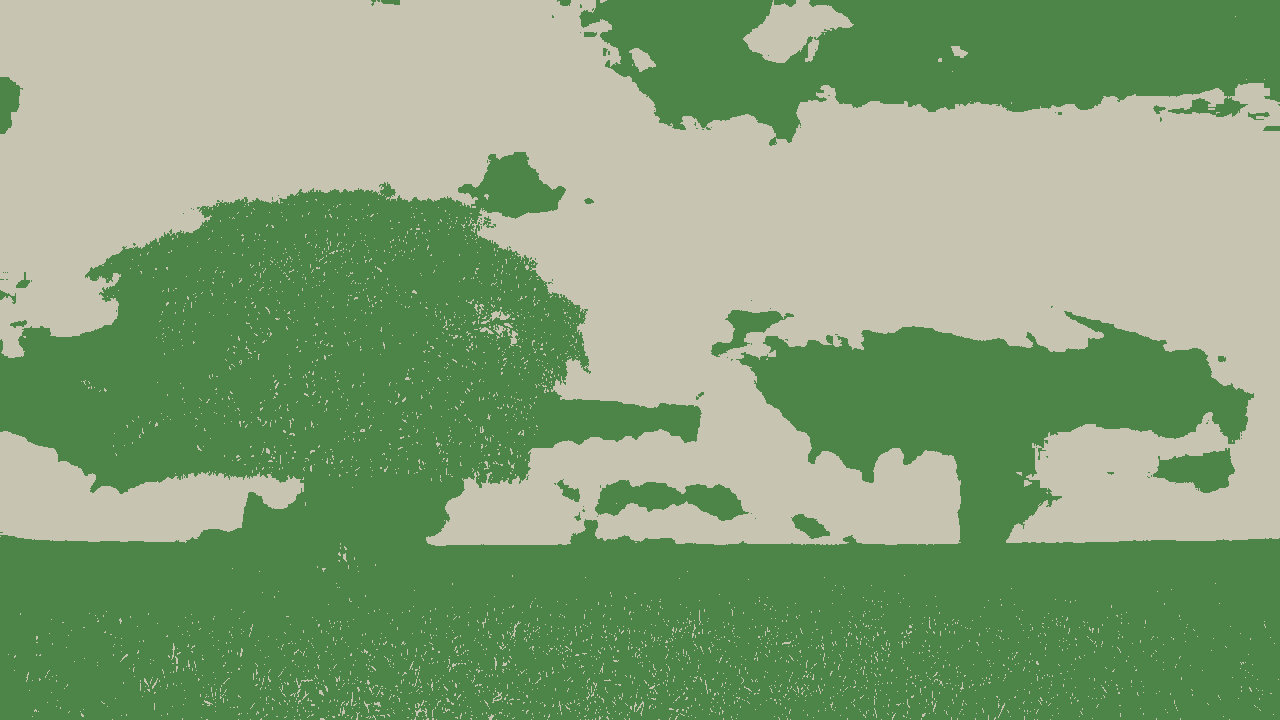

The no of cluster is 3


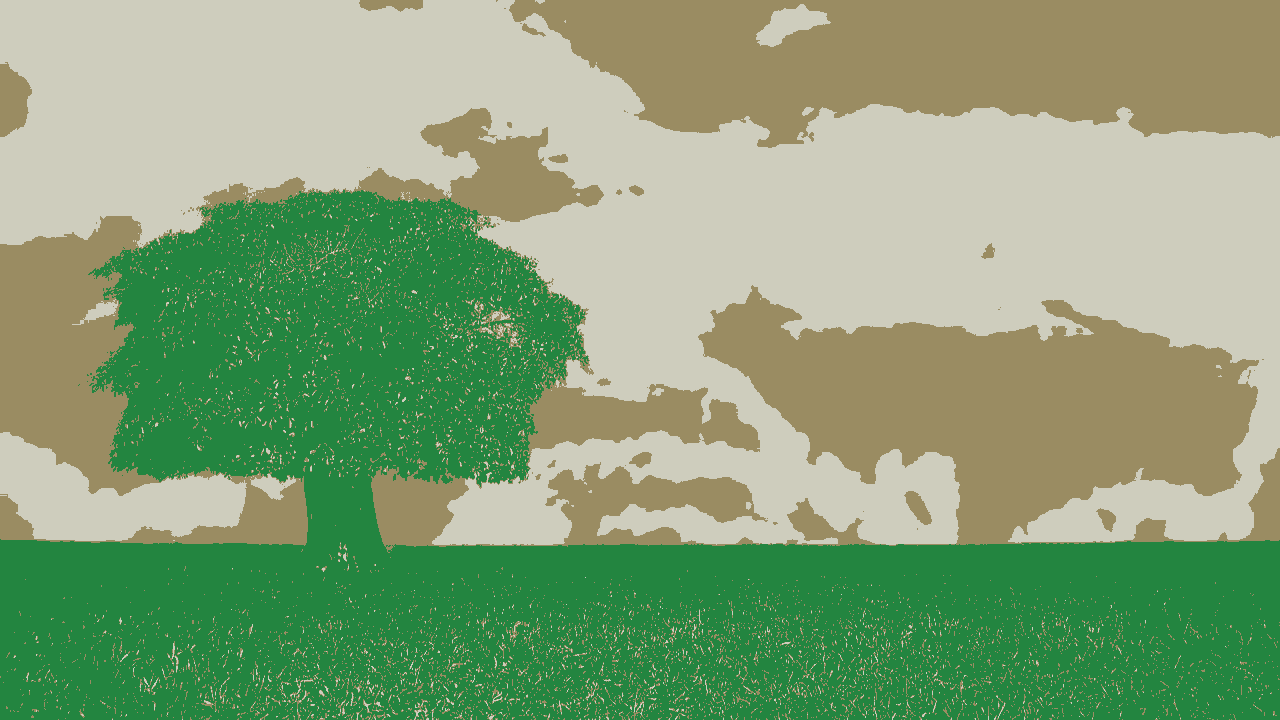

The no of cluster is 4


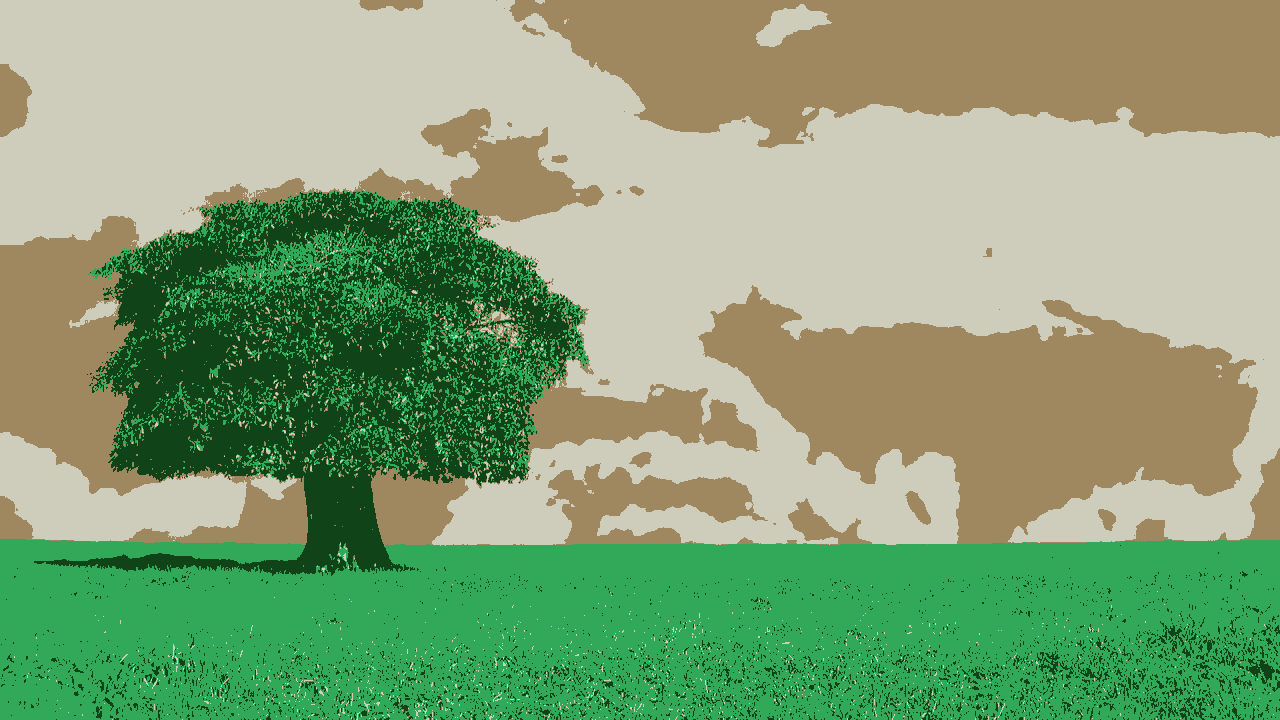

The no of cluster is 5


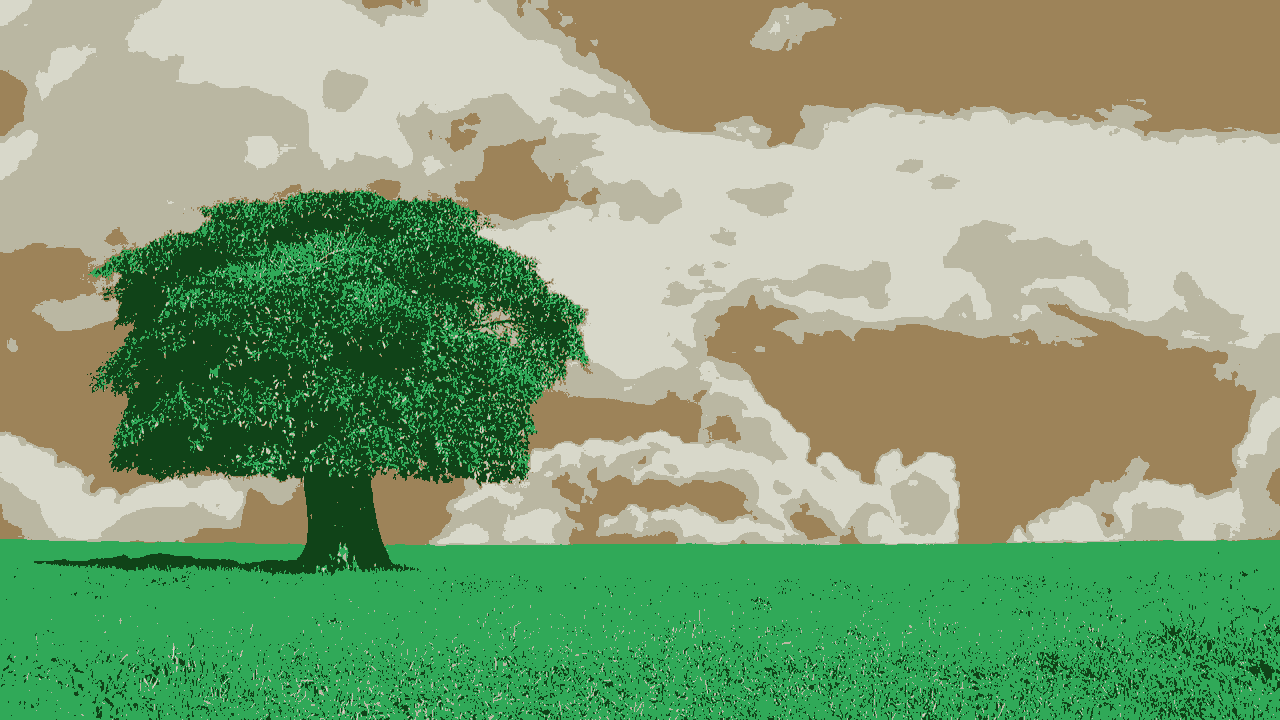

The no of cluster is 6


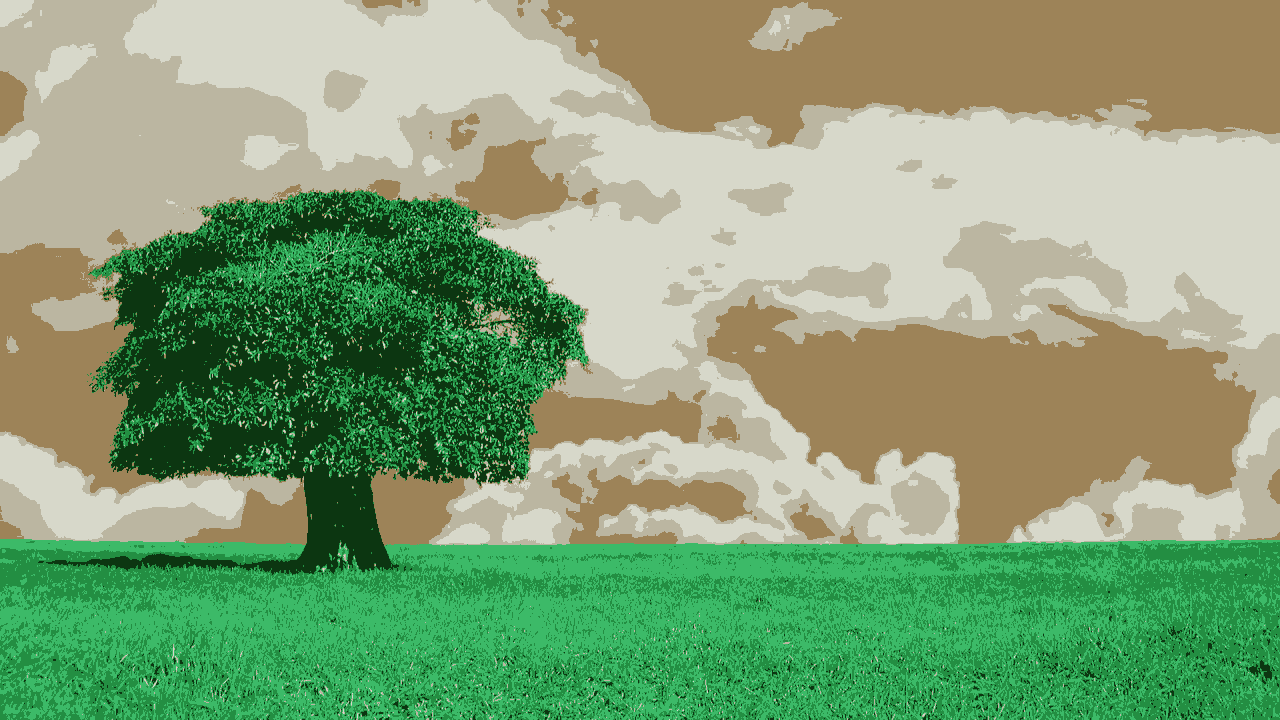

The no of cluster is 7


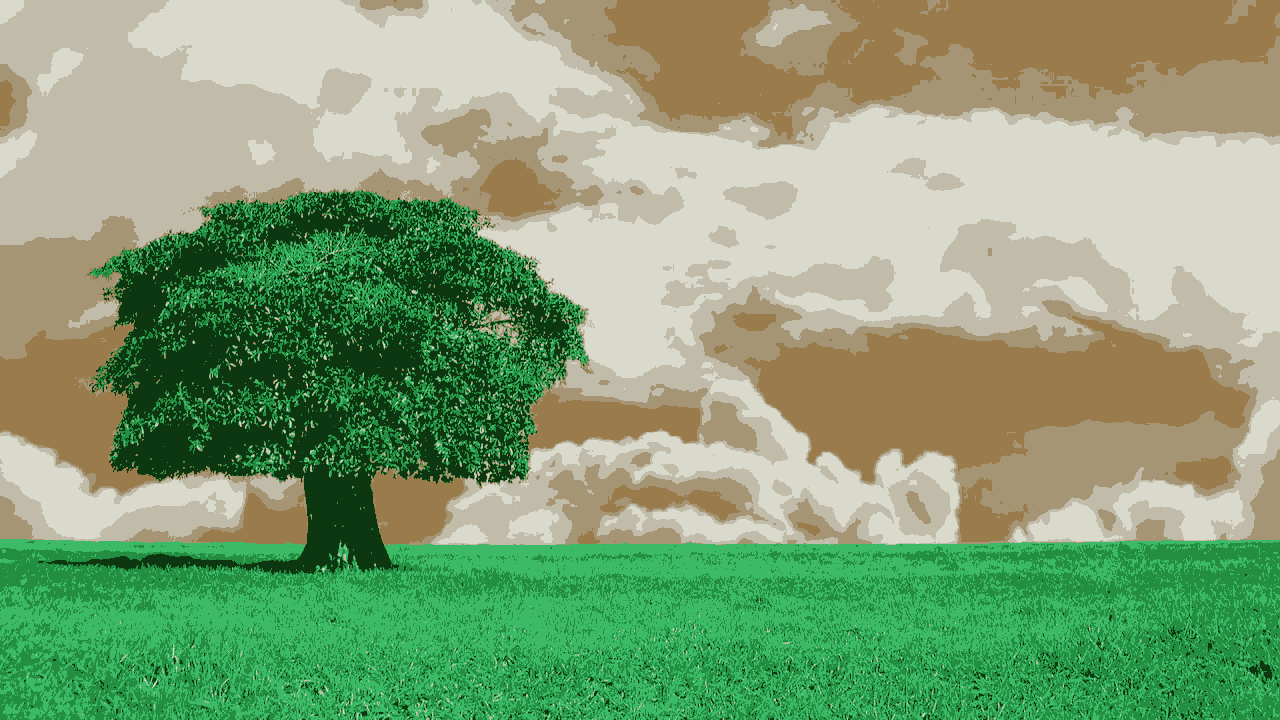

The no of cluster is 8


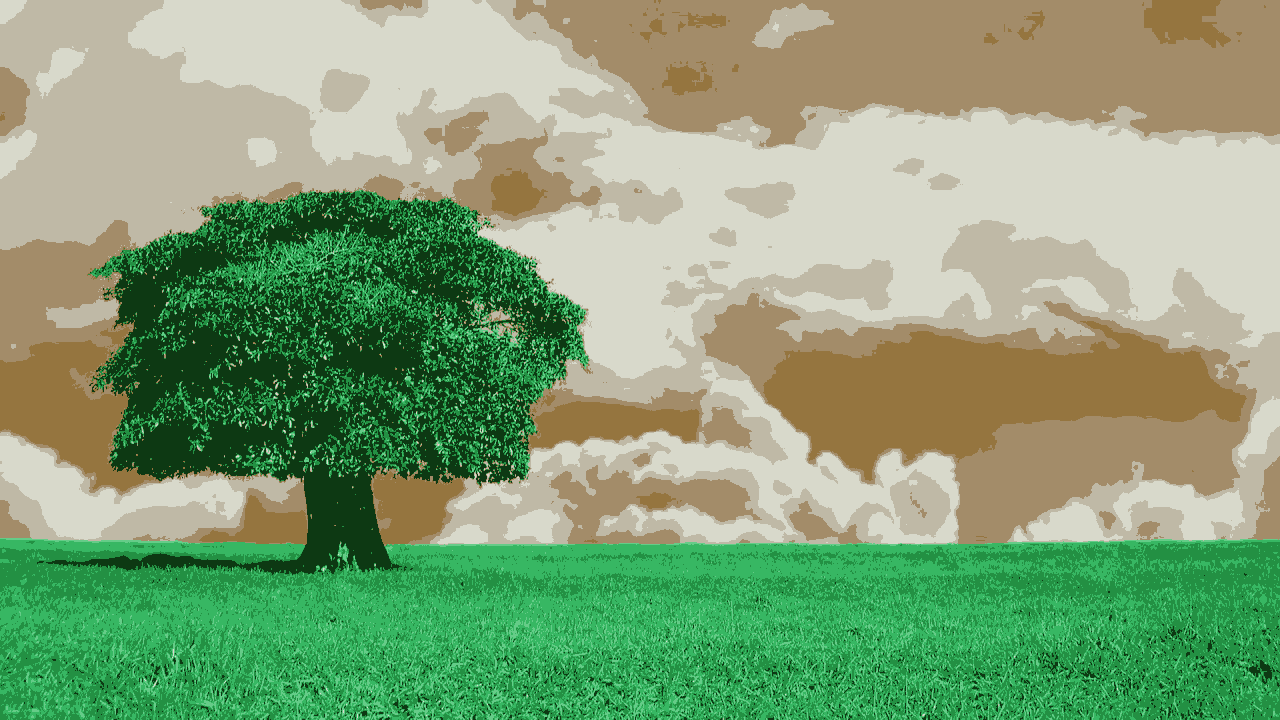

The no of cluster is 9


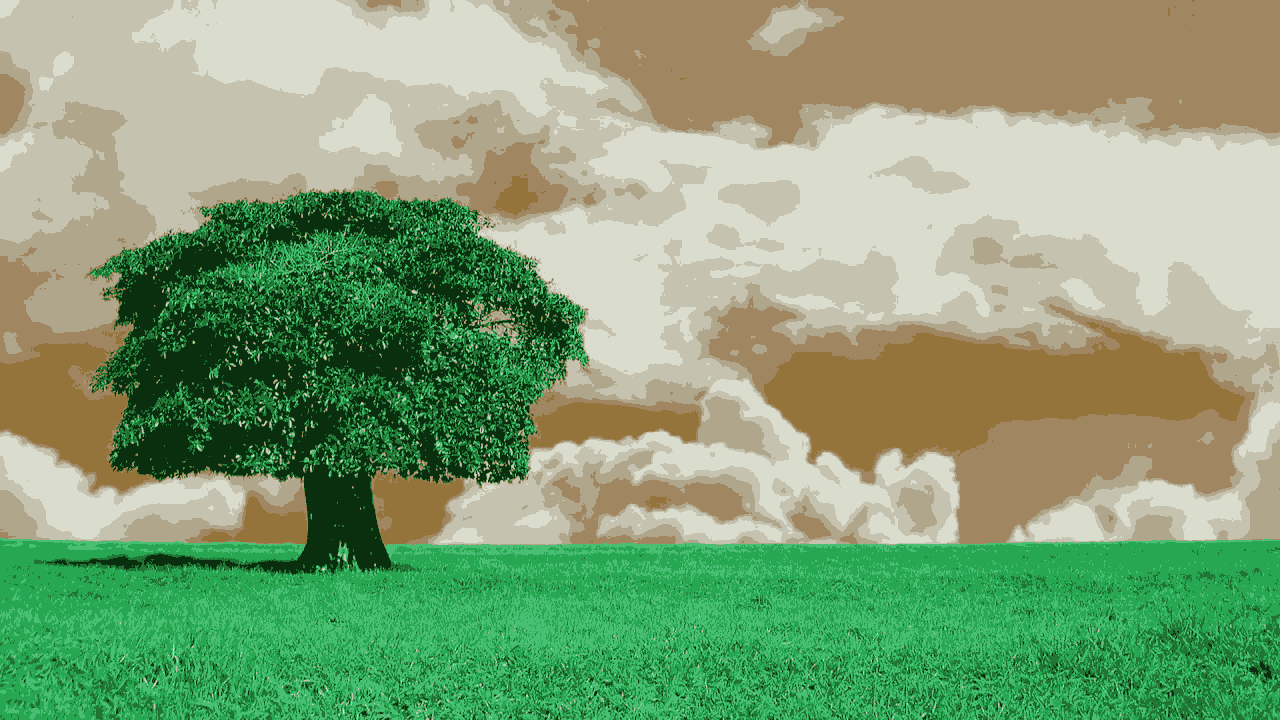

In [69]:
from PIL import Image 
from IPython.display import display
for k in range(2,10):
    ret,label,center=cv2.kmeans(Z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    print(f"The no of cluster is {k}")
    display(Image.fromarray(res2))
